# 1. Project information

**Project title**: DrugBank: An Exploratory Analysis.

**Name:** Mohammed Ali

**Email address associated with your DataCamp account:** mohammed.ali@edu.dsti.institute

**Project description**: The field of drug discovery is about finding new medications for diseases and/or symptoms of interest. Widely used in drug discovery, DrugBank is a publicly available resource that stores high-quality information on drugs and their targets. Since its incpetion in 2005, DrugBank has been frequently used by pharmaceutical companies, medicinal chemists, students and the general public. In this project, we will be performing an exploratory analysis of DrugBank. That is, we will explore the DrugBank database in terms of drugs, drug indications, drug targets, drug manufacturers and so on. Doing so will give us a bird's eye view on the current state of the field of drug discovery in general as well as any ongoing trends. We will be exploring the dataset of this project via data visualization packages such as *ggplot* and *plotly*.

**Dataset(s) used**: The dataset is a subset of the full information stored in the DrugBank database. The dataset consists of information on thousands of drugs including their indications (i.e. diseases/symptoms they are intended to treat), targets, drug manufacturers and so on.

**Assumed student knowledge**: Familiariaty with the *tidyverse* set of packages would be very helpful. Specifically, we will be using the *dplyr* and *ggplot* packages as well as the pipe operator, %>%. We also make use of the *plotly* package to produce some interactive visualizations.

# 2. Project introduction

## 1. *DrugBank*

<img style="float:right; margin:20px" src="http://darwinian-medicine.com/wp-content/uploads/2018/04/selection-of-pills.png" alt="Generic Drugs Photo" width="30%"/>

DrugBank is a publicly free database that is widely used in the field of drug discovery. DrugBank stores extensive information on drugs and their targets. Established in 2005, DrugBank has since been adding so-called "drug cards" which are essentially records that contain supplementary information on the drugs (e.g. chemical structure, commercial names, ADMET properties, etc.) as well as their known targets (usually proteins). These drug cards are regularly curated by experts who ensure that the data inserted into DrugBank are accurate and up-to-date. These data are useful for pharmaceutical scientists and biochemists who are involved in drug development. DrugBank may be accessed at: https://www.drugbank.ca/

The dataset that we will use here is a subset of the full DrugBank database containing the information we need for our analysis. Specifically, we will explore multiple aspects of the DrugBank database to understand the current state of affairs in the DrugBank database and, by proxy, the field of drug discovery in general.

***Let's go!***

<img style="margin-top:20px; margin-bottom:20px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Drugbank_logo.svg/2000px-Drugbank_logo.svg.png" alt="DrugBank Logo" width="98%" align='left'/>

In [3]:
## load necessary packages
suppressMessages({
    require(tidyverse)
    require(lubridate)
})

## load data
drugbank  <- read_csv("datasets/drugbank.csv")

## view 20 random records of the data
set.seed(12345)                                   ## for reproducibility
rndm_row_indices <- sample(nrow(drugbank), 20)    ## 20 random row indices
drugbank[rndm_row_indices,]                       ## show the 20 randomly sampled rows

Parsed with column specification:
cols(
  drug = col_character(),
  creationDate = col_date(format = ""),
  type = col_character(),
  status = col_character()
)


drug,creationDate,type,status
DB09191,2015-10-16,small molecule,experimental
DB12179,2016-10-20,small molecule,investigational
DB10508,2015-12-01,biotech,approved
DB12296,2016-10-20,biotech,investigational
DB05562,2007-11-18,small molecule,investigational
DB01974,2005-06-13,small molecule,experimental
DB03896,2005-06-13,small molecule,experimental
DB06670,2008-03-19,small molecule,investigational
DB09262,2015-10-26,small molecule,approved
DB14065,2018-06-14,small molecule,experimental


## 2. Drugs ... *Biotech* vs. *Small Molecule*

For starters, we'll observe how the DrugBank database has evolved over time in terms of the numbers of stored drugs (and types thereof). Drugs may be categorized into one of two types: *biotech* and *small molecule*. 

Biotech drugs are those with a *biological* origin (i.e. manufactured in, extracted from, or semi-synthesized from biological sources). On the other hand, small-molecule drugs are those that are *chemically synthesized*. They typically have small molecular weights, hence the name.

Let's have a look at the drug types in the DrugBank database and how their numbers have increased over time. We'll display the following statistics over time since the inception of DrugBank:
- The number of *small-molecule* drugs
- The number of *biotech* drugs
- The number of *all* drugs

creationDate,biotech,small molecule,total
2005-06-13,96,3888,3984
2007-03-30,0,4,4
2007-04-04,0,1,1
2007-05-08,0,1,1
2007-05-14,0,1,1
2007-05-15,0,1,1
2007-05-16,10,14,24
2007-05-17,0,2,2
2007-05-23,1,1,2
2007-06-28,0,2,2


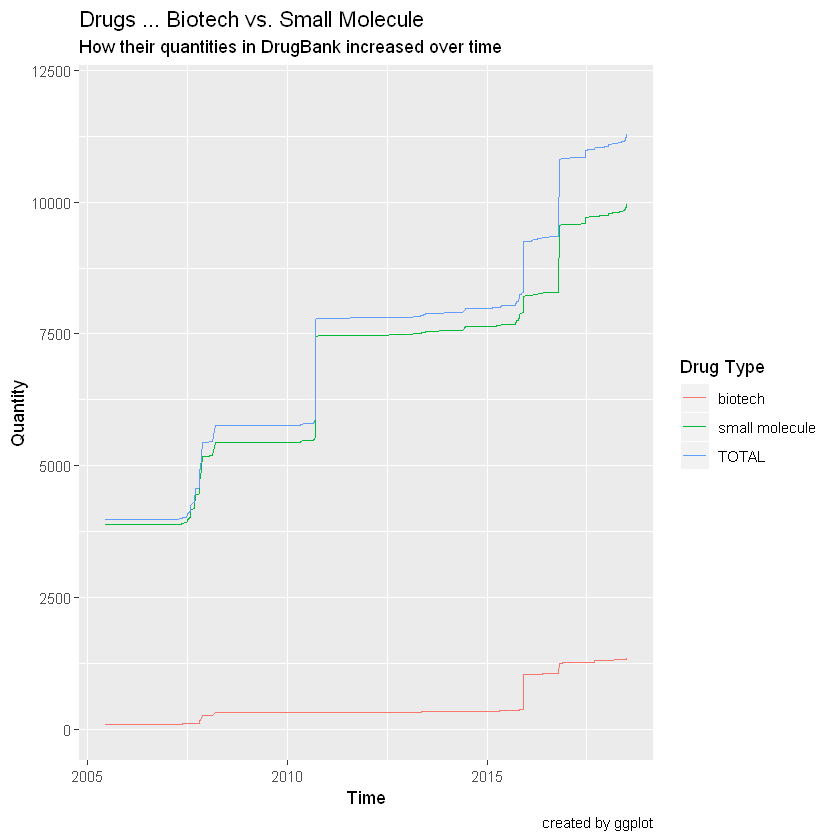

In [4]:
## get data required for plot: p1
p1_data <- 
    drugbank %>%
    group_by(creationDate, type) %>% 
    summarise(count = n()) %>%         ## colnames(p1_data) = c('creationDate', 'type', 'count')
    spread(type, count)                ## colnames(p1_data) = c('creationDate', 'biotech', 'small molecule')

## remove NA values in the data
p1_data[is.na(p1_data)] <- 0

## add 'total' column containing "biotech + small molecule"
p1_data <- 
    p1_data %>% 
    mutate(total = (biotech + `small molecule`))

## arrange records by creationDate
p1_data <- 
    p1_data %>% 
    arrange(creationDate)

## display first 10 records of the data to be visualized
p1_data %>% head(10)

## get plot of the quantities of the different drug types over time
p1 <- 
    p1_data %>%  
    ggplot(aes(x = creationDate)) + 
    geom_line(aes(y = cumsum(biotech), col = 'biotech')) + 
    geom_line(aes(y = cumsum(`small molecule`), col = 'small molecule')) + 
    geom_line(aes(y = cumsum(total), col = 'TOTAL')) + 
    scale_y_continuous(limits = c(0,12000)) + 
    xlab('Time') + 
    ylab('Quantity') + 
    labs(title = 'Drugs ... Biotech vs. Small Molecule',
         subtitle = 'How their quantities in DrugBank increased over time', 
         caption = 'created by ggplot') + 
    scale_colour_discrete(name = "Drug Type")

## display plot
p1

## 3. Drugs ... *Status*

Now, we will have a look at the drug *status* (i.e. the drug development status). According to [DrugBank's documentation](https://www.drugbank.ca/documentation), the status of a drug can have one of the following values:
- *Experimental*: The drug was experimentally shown to bind specific proteins in mammals, bacteria, viruses, fungi, or parasites
- *Investigational*: The drug is in some phase of the drug approval process.
- *Approved*: The drug was approved in at least one jurisdiction.
- *Withdrawn*: The drug (previously approved) was withdrawn from the market.
- *Other*: Other values exist for the *status* variable that we will ignore for now.

We will create a cumulative plot like the one above but instead of a line graph, we will display an area chart.

creationDate,approved,experimental,investigational,other,withdrawn
2005,1225,2601,67,3,88
2007,314,304,796,9,42
2008,90,0,220,0,4
2009,1,0,0,0,1
2010,113,1870,29,8,11
2011,7,0,0,0,0
2012,7,0,0,0,0
2013,62,6,15,0,4
2014,33,7,2,0,48
2015,1176,38,11,15,32


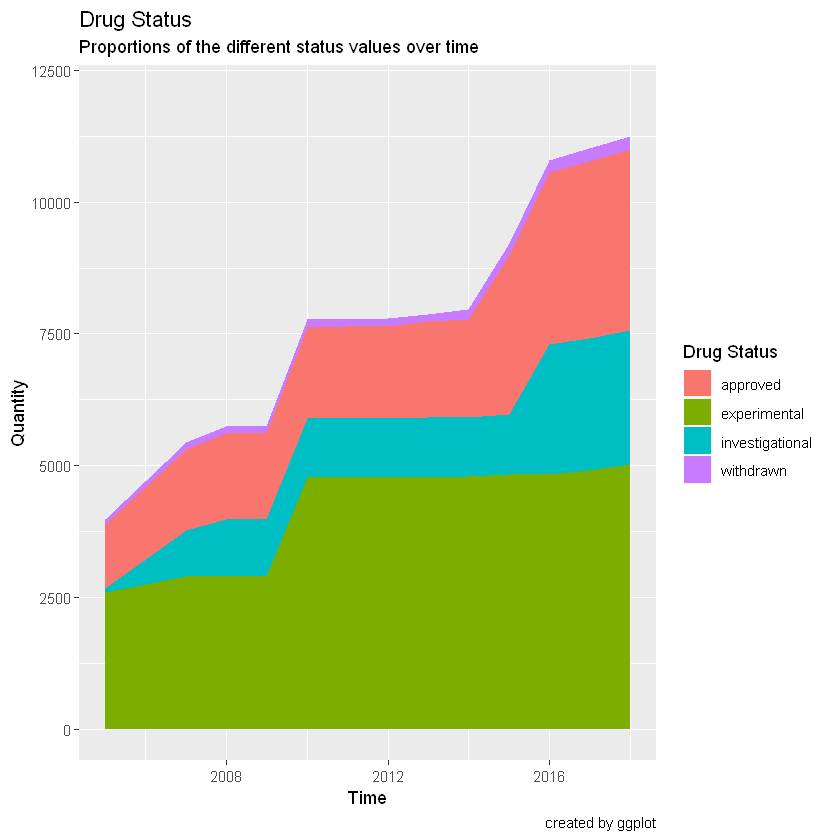

In [5]:
## get data required for plot: p2
p2_data <- 
    drugbank %>% 
    mutate(creationDate = year(creationDate)) %>% 
    group_by(creationDate, status) %>% 
    summarise(count = n()) %>% 
    spread(status, count)

## remove NA values in the data
p2_data[is.na(p2_data)] <- 0

## arrange records by creationDate
p2_data <- 
    p2_data %>% 
    arrange(creationDate)

## display the data to be visualized
p2_data

# cumulative sums for all status types
p2_data[,2:ncol(p2_data)] <- 
    p2_data[,2:ncol(p2_data)] %>% 
    mutate_all(cumsum)

## get plot of the quantities of the different drug statuses over time
p2 <- 
    p2_data %>% 
    ggplot(aes(x = creationDate)) + 
    geom_area(aes(y = experimental+investigational+approved+withdrawn, fill = 'withdrawn')) +  
    geom_area(aes(y = experimental+investigational+approved, fill = 'approved')) +  
    geom_area(aes(y = experimental+investigational, fill = 'investigational')) +  
    geom_area(aes(y = experimental, fill = 'experimental')) +
    scale_y_continuous(limits = c(0,12000)) + 
    xlab('Time') + 
    ylab('Quantity') + 
    labs(title = 'Drug Status',
         subtitle = 'Proportions of the different status values over time', 
         caption = 'created by ggplot', 
         fill = 'Drug Status')

## display plot
p2

*Stop here! Only the three first tasks. :)*